In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
## Load Data into Dataframes

import pandas as pd
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
xtest=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
## Split train data into train and validation with stratified sampling

from sklearn.model_selection import train_test_split
Y=train['label']
xtrain, xcv, ytrain, ycv = train_test_split(train, Y, test_size=0.33, stratify=Y)

In [5]:
xtrain=xtrain[xtrain.columns[1:785]]
xcv=xcv[xcv.columns[1:785]]


In [6]:
print(xtrain.shape, ytrain.shape)
print(xcv.shape, ycv.shape)


(28140, 784) (28140,)
(13860, 784) (13860,)


In [7]:
from keras.utils import np_utils
import seaborn as sns
from keras.initializers import RandomNormal, he_normal

Using TensorFlow backend.


In [8]:
%matplotlib inline
import matplotlib.pyplot as plot
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label='Validation Loss')
    ax.plot(x, ty, 'r', label='Train Loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [9]:
xtrain=xtrain.to_numpy()
xcv=xcv.to_numpy()
ytrain=ytrain.to_numpy()
ycv=ycv.to_numpy()

In [10]:
xtest=xtest.to_numpy()

In [11]:
## normalize data (min-max normalization) - so that values will be in 0 - 1

xtrain=xtrain/255
xcv=xcv/255

In [12]:
print(ytrain[1])

0


In [13]:
## convert class labels into vectors

ytrain=np_utils.to_categorical(ytrain,10)
ycv=np_utils.to_categorical(ycv, 10)

In [14]:
print(ytrain[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation
## modelparams
outputdim=10
inputdim=xtrain.shape[1]
batchsize=128
nbepoch=20

In [16]:
## Multilayer Perceptron 
# MLP + BatchNorm +Dropout + RELU + ADAM   -   4 layers  -  (1024, 256, 128, 64)

from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout


model1=Sequential()
'''
model1.add(Dense(1024,activation='relu',input_shape=(inputdim,),
                 kernel_initializer=he_normal(seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
'''           
model1.add(Dense(256,activation='relu',input_shape=(inputdim,),
                 kernel_initializer=he_normal(seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))

model1.add(Dense(128,activation='relu',input_shape=(inputdim,),
                 kernel_initializer=he_normal(seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
           
model1.add(Dense(64,activation='relu',input_shape=(inputdim,),
                 kernel_initializer=he_normal(seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
           
model1.add(Dense(outputdim, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [17]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', 
               metrics=['accuracy'])
history=model1.fit(xtrain, ytrain, batch_size=batchsize, 
                   epochs=nbepoch, verbose=1, validation_data=(xcv, ycv))

Train on 28140 samples, validate on 13860 samples
Epoch 1/20
28140/28140 [==============================] - 5s 161us/step - loss: 1.2024 - accuracy: 0.6226 - val_loss: 0.3730 - val_accuracy: 0.8983
Epoch 2/20
28140/28140 [==============================] - 3s 123us/step - loss: 0.5087 - accuracy: 0.8470 - val_loss: 0.2370 - val_accuracy: 0.9256
Epoch 3/20
28140/28140 [==============================] - 3s 124us/step - loss: 0.3803 - accuracy: 0.8885 - val_loss: 0.1974 - val_accuracy: 0.9405
Epoch 4/20
28140/28140 [==============================] - 3s 123us/step - loss: 0.3177 - accuracy: 0.9100 - val_loss: 0.1662 - val_accuracy: 0.9501
Epoch 5/20
28140/28140 [==============================] - 3s 123us/step - loss: 0.2785 - accuracy: 0.9204 - val_loss: 0.1599 - val_accuracy: 0.9528
Epoch 6/20
28140/28140 [==============================] - 3s 122us/step - loss: 0.2458 - accuracy: 0.9311 - val_loss: 0.1443 - val_accuracy: 0.9567
Epoch 7/20
28140/28140 [==============================] - 3s 1

CV Loss= 0.10998255790852006
CV Accuracy= 0.9702741503715515


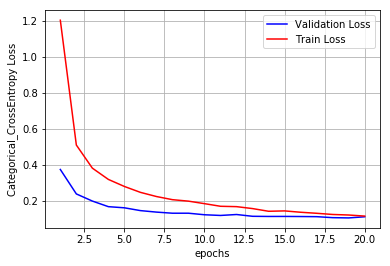

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
score=model1.evaluate(xcv, ycv, verbose=0)
print('CV Loss=', score[0])
print('CV Accuracy=', score[1])
fig, ax=plt.subplots(1,1)
ax.set_xlabel('epochs')
ax.set_ylabel('Categorical_CrossEntropy Loss')
x=list(range(1, nbepoch+1))
vy=history.history['val_loss']
ty=history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [19]:
## Test class label predictions

ytest=model1.predict_classes(xtest)

In [20]:
ids=np.arange(1,28001)
print(ids)
print(ytest)
results_mlp=pd.DataFrame({'ImageId':ids, 'Label':ytest})
results_mlp.head()

[    1     2     3 ... 27998 27999 28000]
[2 0 9 ... 3 9 2]


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


In [21]:
filename='Digit_Recognizer_Predictions_MLP.csv'
results_mlp.to_csv(filename, index=False)
print('Saved File ', filename)

Saved File  Digit_Recognizer_Predictions_MLP.csv
